# Mas de autoencoders
* Mas adelante (la semana entrante) vamos a comenzar con **variational autoencoders**. Los usaremos para modelos **generativos**.

* Hoy veremos dos ejemplos (generados por ChatGPT). Reduccion de dimensionalidad usando PCA y usando Autoencoders. Mucho mas drastica que la anterior (32 dimensiones) la de hoy 2 dimensiones.

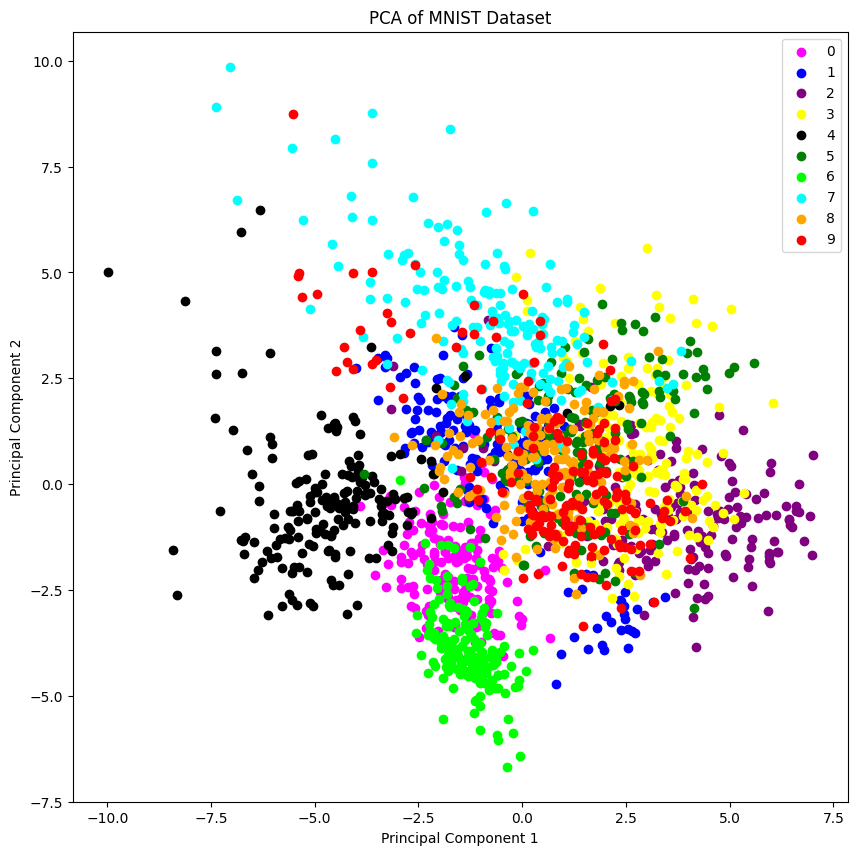

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# load the MNIST dataset
digits = datasets.load_digits()
data = digits.data

# standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# apply PCA to the data
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# creamos un scatter plot
plt.figure(figsize=(10, 10))
colors=['magenta', 'blue', 'purple','yellow', 'black', 'green', 'lime', 'cyan', 'orange', 'red']

for i in range(len(colors)):
    px = data_pca[:, 0][digits.target == i]
    py = data_pca[:, 1][digits.target == i]
    plt.scatter(px, py, c=colors[i], label=digits.target_names[i])

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset')

plt.show()




In [2]:
len(data)

1797

# Proyeccion a 2D con autoencoders

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


# fijamos una semilla para reproducibilidad
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.astype('float32') / 255.
x_test=x_test.reshape((x_test.shape[0], -1))

# parametros de red
input_shape = (784,)
encoding_dim = 2
intermediate_dim=128
epochs=50
batch_size=256

# encoder model
input_img = Input(shape=input_shape)
h = Dense(intermediate_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(h)



# decoder model
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(input_shape[0], activation='sigmoid')
h_decoded = decoder_h(encoded)
decoded = decoder_mean(h_decoded)

# autoencoder model
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train mode
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1)

# predictions
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)





11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 0.3679 - val_loss: 0.2348
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2332 - val_loss: 0.2249
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2245 - val_loss: 0.2191
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2193 - val_loss: 0.2156
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2158 - val_loss: 0.2128
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2129 - val_loss: 0.2104
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2103 - val_loss: 0.2083
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2082 - val_loss: 0.2066
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2064 - val_loss: 0.2052
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2050 - val_loss: 0.2040
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2037 - val_loss: 0.2030

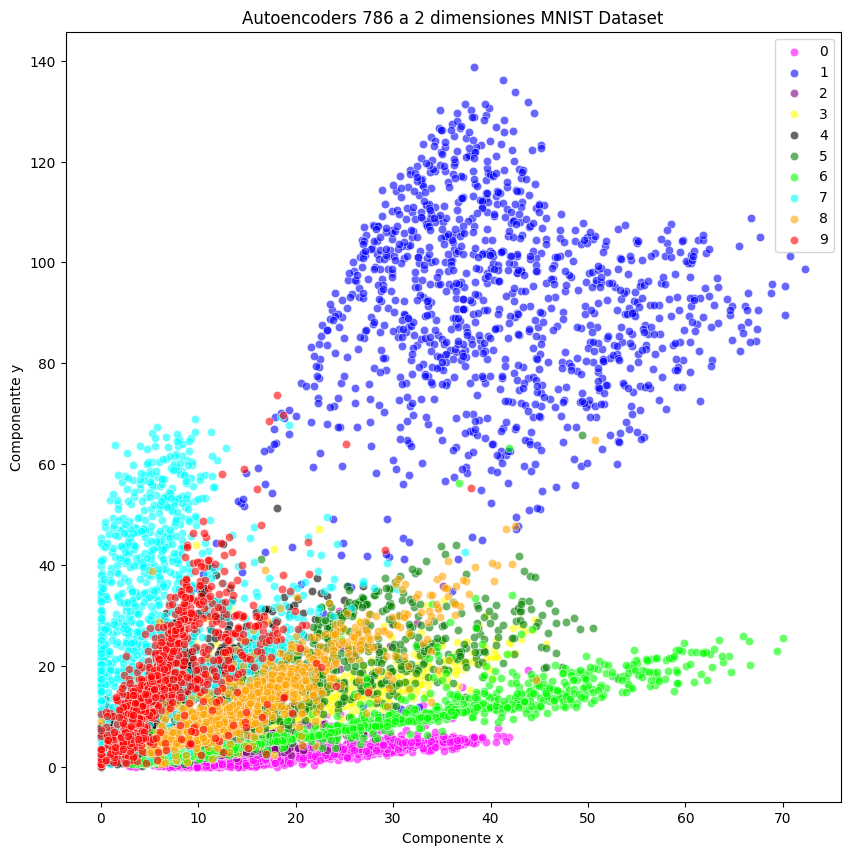

In [4]:
# scatter plot
plt.figure(figsize=(10, 10))
colors=['magenta', 'blue', 'purple','yellow', 'black', 'green', 'lime', 'cyan', 'orange', 'red']
for i in range(10):
    plt.scatter(x_test_encoded[y_test == i, 0], x_test_encoded[y_test == i, 1],
                 alpha=0.6, c=colors[i], label=str(i), edgecolors='w', linewidth=0.5)
plt.legend()
plt.xlabel('Componente x')
plt.ylabel('Componentte y')
plt.title('Autoencoders 786 a 2 dimensiones MNIST Dataset')
plt.show()

# modelos generativos a partir de auto-encoders (los hacemos en la siguiente clase usando **variational autoencoders**).

* Entran los objetos del tipo que se quieren generar. Por ejemplo videos, audios (voz , musica) imagenes, texto.
* Entrenar con autoencoders y obtener los pesos (weights) ($\theta$s)
* Corta la red removiendo la primera mitad.
* Muestrea (sample) un punto en el espacio latente (en este caso de dos dimensiones)

* Usa los pesos aprendidos para generar la salida correspondiente a la muestra escogida.

# Eliminacion de ruido con autocencoders (denoising)
Hay una ventaja: no se necesita regularizacion por que
el ruido sirve de regularizador.

El proceso es como sigue

* Se agrega ruido a las imagenes limpias.
* Se reconstruye el error de la diferencia entre las imagenes limpias y sucias.

La funcion

$$J(\theta) = \| x - \hat{x} \| $$
vamos a la implementacion.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model


# load data and add noise
np.random.seed(42)
(x_train, _), (x_test, _) = mnist.load_data()

# normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshape data to include channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# clip the values to the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



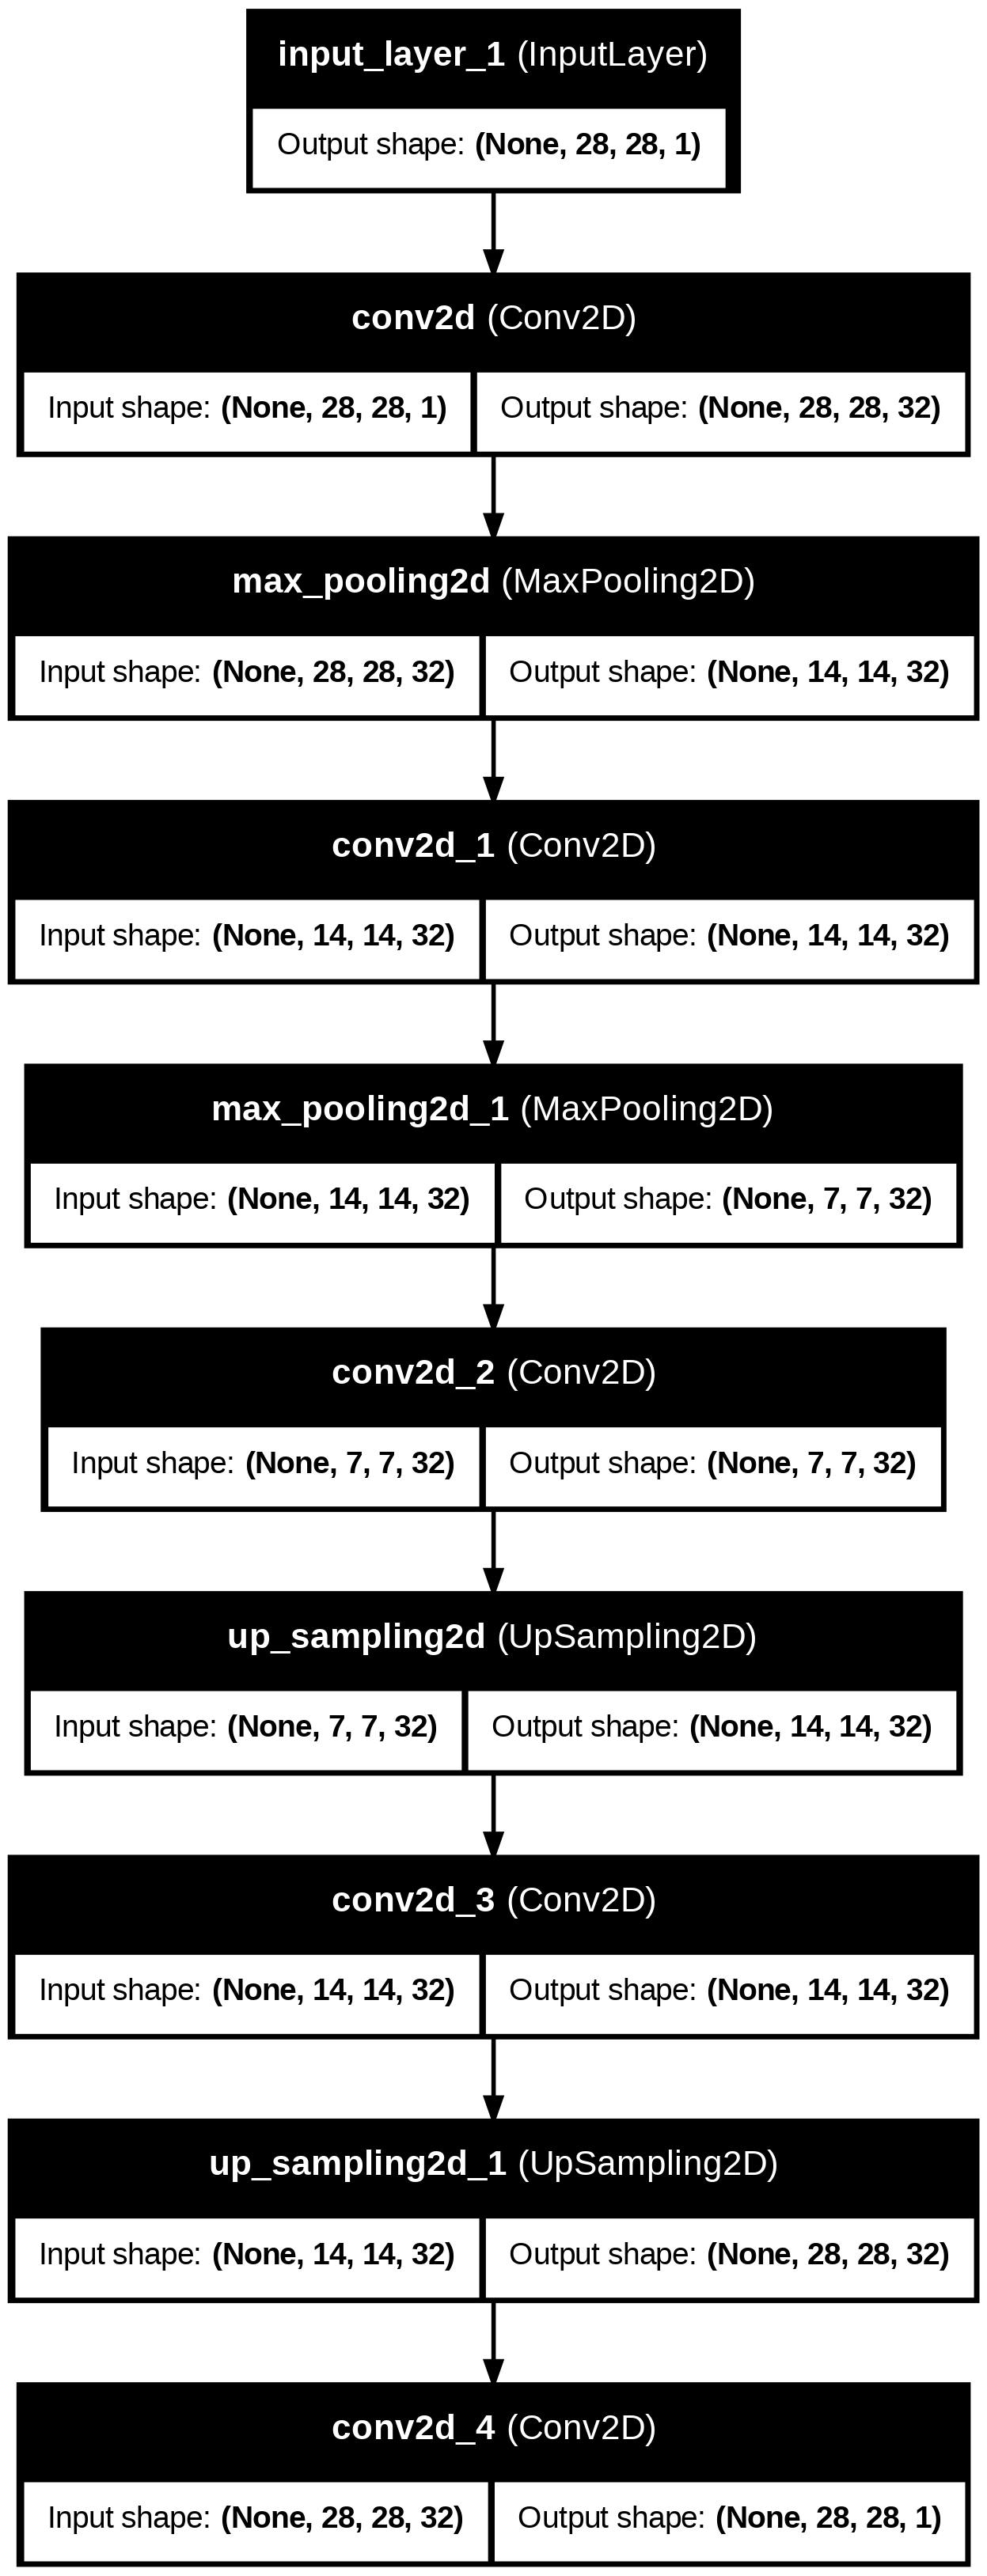

In [6]:
# Set the autoencoder
# define autoencoder
input_img = Input(shape=(28, 28, 1))

# do Conv2D, MaxPooling, Conv2D
x = Conv2D( 32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D( 32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# define the decoder
x = Conv2D( 32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D( 32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D( 1, (3, 3), activation='sigmoid', padding='same')(x)

# define the autoencoder model
autoencoder = Model(input_img, decoded)

# compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# plot model
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True, show_layer_names=True)





In [7]:
# train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                verbose=1)

# prediccion
decoded_imgs = autoencoder.predict(x_test_noisy)



#

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2518 - val_loss: 0.1174
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1161 - val_loss: 0.1091
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1093 - val_loss: 0.1053
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1057 - val_loss: 0.1028
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1035 - val_loss: 0.1014
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1021 - val_loss: 0.1004
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1011 - val_loss: 0.0996
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1003 - val_loss: 0.0989
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0996 - val_loss: 0.0983
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0991 - val_loss: 0.0978
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0986 - val_loss: 0.0975
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

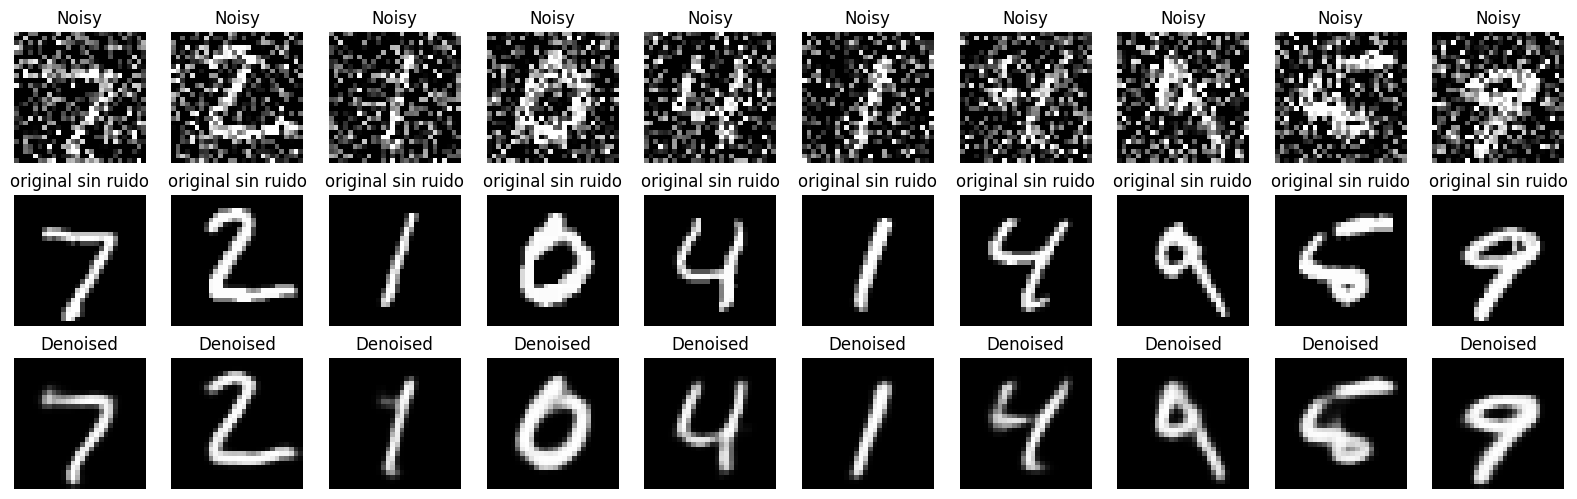

In [13]:
# Graph the results
n=10 # numero de imagenes
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title('Noisy')
    plt.axis('off')

    # display original
    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('original sin ruido')
    plt.axis('off')

    # display decoded image
    ax = plt.subplot(3, n, i + 1 +  2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Denoised')
    plt.axis('off')

plt.show()

# Next class:
* Anomaly detection with AutoEncoders
* Variational Autoencoders (generative models)